In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from HanTa import HanoverTagger as ht

import codecs

In [3]:
# conda install -c conda-forge wordcloud

In [4]:
isi_data = pd.read_csv("../Merged_Data/V2_ISI_Merged_Cleaned.csv", sep=",", index_col=0)

In [5]:
isi_data = isi_data.drop(['AKTIV', 'AUSMUSTERUNG_DAT', 'MONAT', 'JAHR'], axis=1)

isi_data.UPDATE_DATE = isi_data.UPDATE_DATE.astype(int)
isi_data.INBETRIEB_AB = isi_data.INBETRIEB_AB.astype(int)
isi_data.BAUJAHR = isi_data.BAUJAHR.astype(int)

In [6]:
isi_data.tail()

,FZ-ID,AUFTRAGSNR,AUFTRAGSTEXT,ILA,WHO_NUMMER,AUFTRAGSART,ECKSTARTTERMIN,ECKENDTERMIN,BEZUGSDATUM,UPDATE_DATE,...,FZ_HOEHE,MOTORTYP,EURONORM,INBETRIEB_AB,KLIMAANLAGE,ABGASFILTER,ANZAHL_TUEREN,ZUL_100KMH,BAUJAHR,PLAETZE
97433,058137d8-e29a-4e5a-b4a7-ab59c26f3596,1037392920,Frist 510,510,1,510,43937,43937,43942,43986,...,3.25,NaN,6,43901,0,NaN,0,0,2020,155
97434,058137d8-e29a-4e5a-b4a7-ab59c26f3596,1037392920,Frist 510,510,1,510,43937,43937,43942,43986,...,3.25,NaN,6,43901,0,NaN,0,0,2020,155
97435,725ca804-aa2f-4c76-b4ea-b9a71e378ee1,1037407073,außerplanm. Instandsetzung,030,1,510,43941,43941,43942,43986,...,3.16,D1556LOH10,6,43887,0,04,3,0,2020,145
97436,725ca804-aa2f-4c76-b4ea-b9a71e378ee1,1037407073,außerplanm. Instandsetzung,030,1,510,43941,43941,43942,43986,...,3.16,D1556LOH10,6,43887,0,04,3,0,2020,145
97437,725ca804-aa2f-4c76-b4ea-b9a71e378ee1,1037407073,außerplanm. Instandsetzung,030,1,510,43941,43941,43942,43986,...,3.16,D1556LOH10,6,43887,0,04,3,0,2020,145


In [7]:
isi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97438 entries, 0 to 97437
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FZ-ID                97438 non-null  object 
 1   AUFTRAGSNR           97438 non-null  int64  
 2   AUFTRAGSTEXT         97438 non-null  object 
 3   ILA                  97438 non-null  object 
 4   WHO_NUMMER           97438 non-null  int64  
 5   AUFTRAGSART          97438 non-null  object 
 6   ECKSTARTTERMIN       97438 non-null  int64  
 7   ECKENDTERMIN         97438 non-null  int64  
 8   BEZUGSDATUM          97438 non-null  int64  
 9   UPDATE_DATE          97438 non-null  int64  
 10  UEBERGEORDN_AUFTRAG  97438 non-null  float64
 11  BAUART_x             97438 non-null  object 
 12  ISAS                 97438 non-null  object 
 13  AUFTRAGSBEZEICHNUNG  97438 non-null  object 
 14  PRODUKTCODE          97438 non-null  object 
 15  PRODUKTBEZEICHNUNG   97438 non-null 

In [8]:
#isi_dupli = isi_data_neu[isi_data_neu.duplicated()]
#print('Anzahl der Duplikate: ', isi_dupli.shape)

In [9]:
isi_data_neu = isi_data

In [10]:
isi_data_neu.UPDATE_DATE.sample(19)

35375    43872
47588    43964
65087    43986
810      43986
80047    43910
56833    43986
78559    43986
49835    43933
26600    43986
58737    43986
9017     43986
63717    43986
54112    43965
72075    43986
44909    43986
58079    43898
69808    43986
78111    43986
17641    43986
Name: UPDATE_DATE, dtype: int64

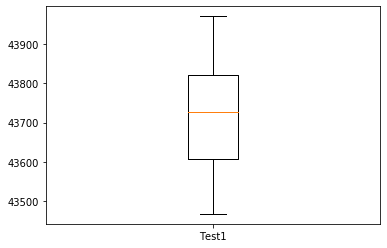

In [11]:
labels = ['Test1']
plot = plt.boxplot(isi_data_neu['BEZUGSDATUM'],vert=True, labels=labels)

plt.savefig('test.pdf') 

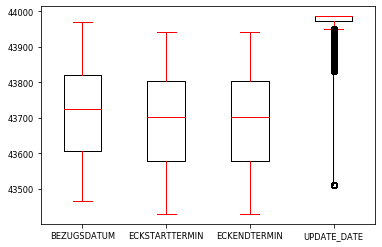

In [12]:
df = pd.DataFrame(data = isi_data_neu, columns = ['BEZUGSDATUM', 'ECKSTARTTERMIN', 'ECKENDTERMIN', 'UPDATE_DATE',])
df.plot(kind='box', grid=False, backend='matplotlib', rot=0, fontsize='small', 
        color=dict(boxes='black', whiskers='red', medians='red', caps='red'),
        boxprops=dict(linestyle='-', linewidth=1),
        flierprops=dict(linestyle='-', linewidth=1),
        medianprops=dict(linestyle='-', linewidth=1),
        whiskerprops=dict(linestyle='-', linewidth=1),
        capprops=dict(linestyle='-', linewidth=1),showfliers=True,)

plt.savefig('test2.pdf')

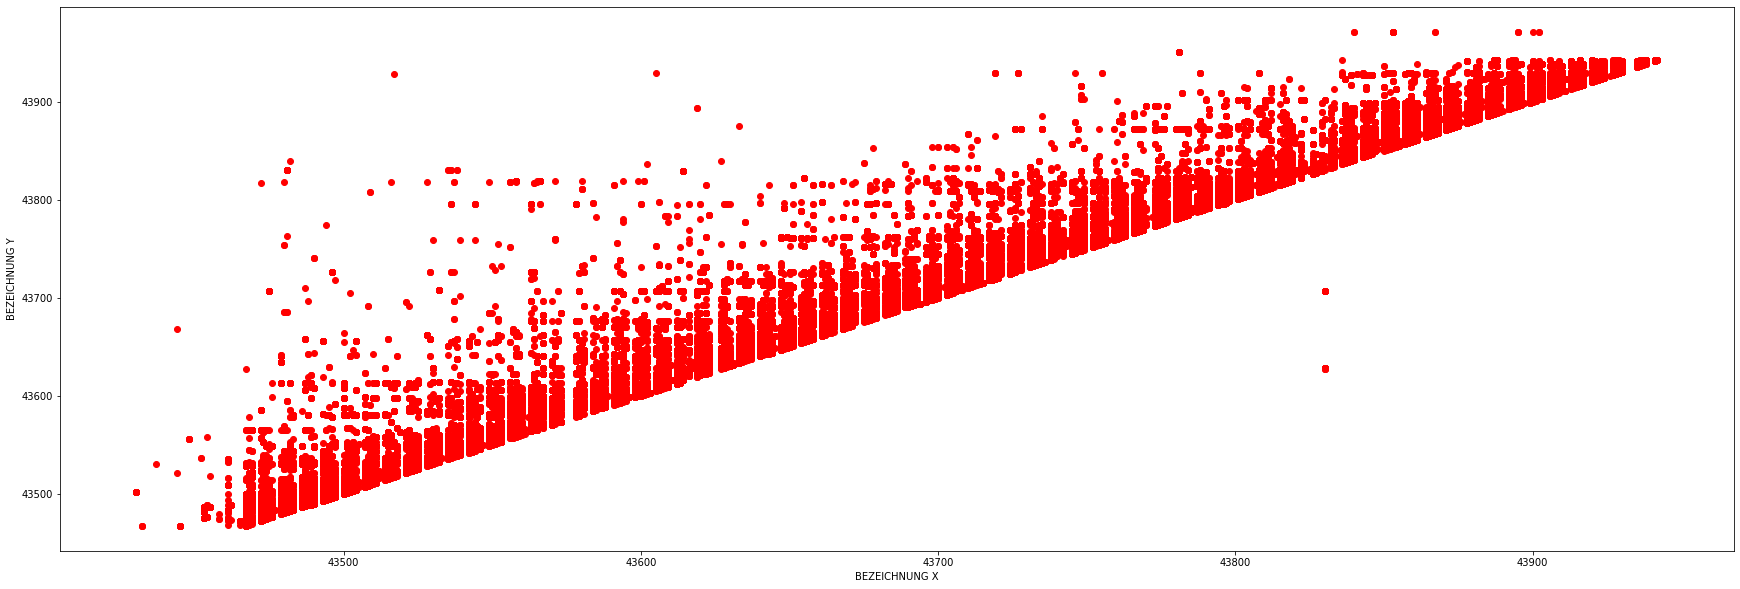

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
ax.scatter(isi_data_neu['ECKENDTERMIN'], isi_data_neu['BEZUGSDATUM'], color='red')
ax.set_xlabel('BEZEICHNUNG X')
ax.set_ylabel('BEZEICHNUNG Y')

plt.savefig('test3.pdf')

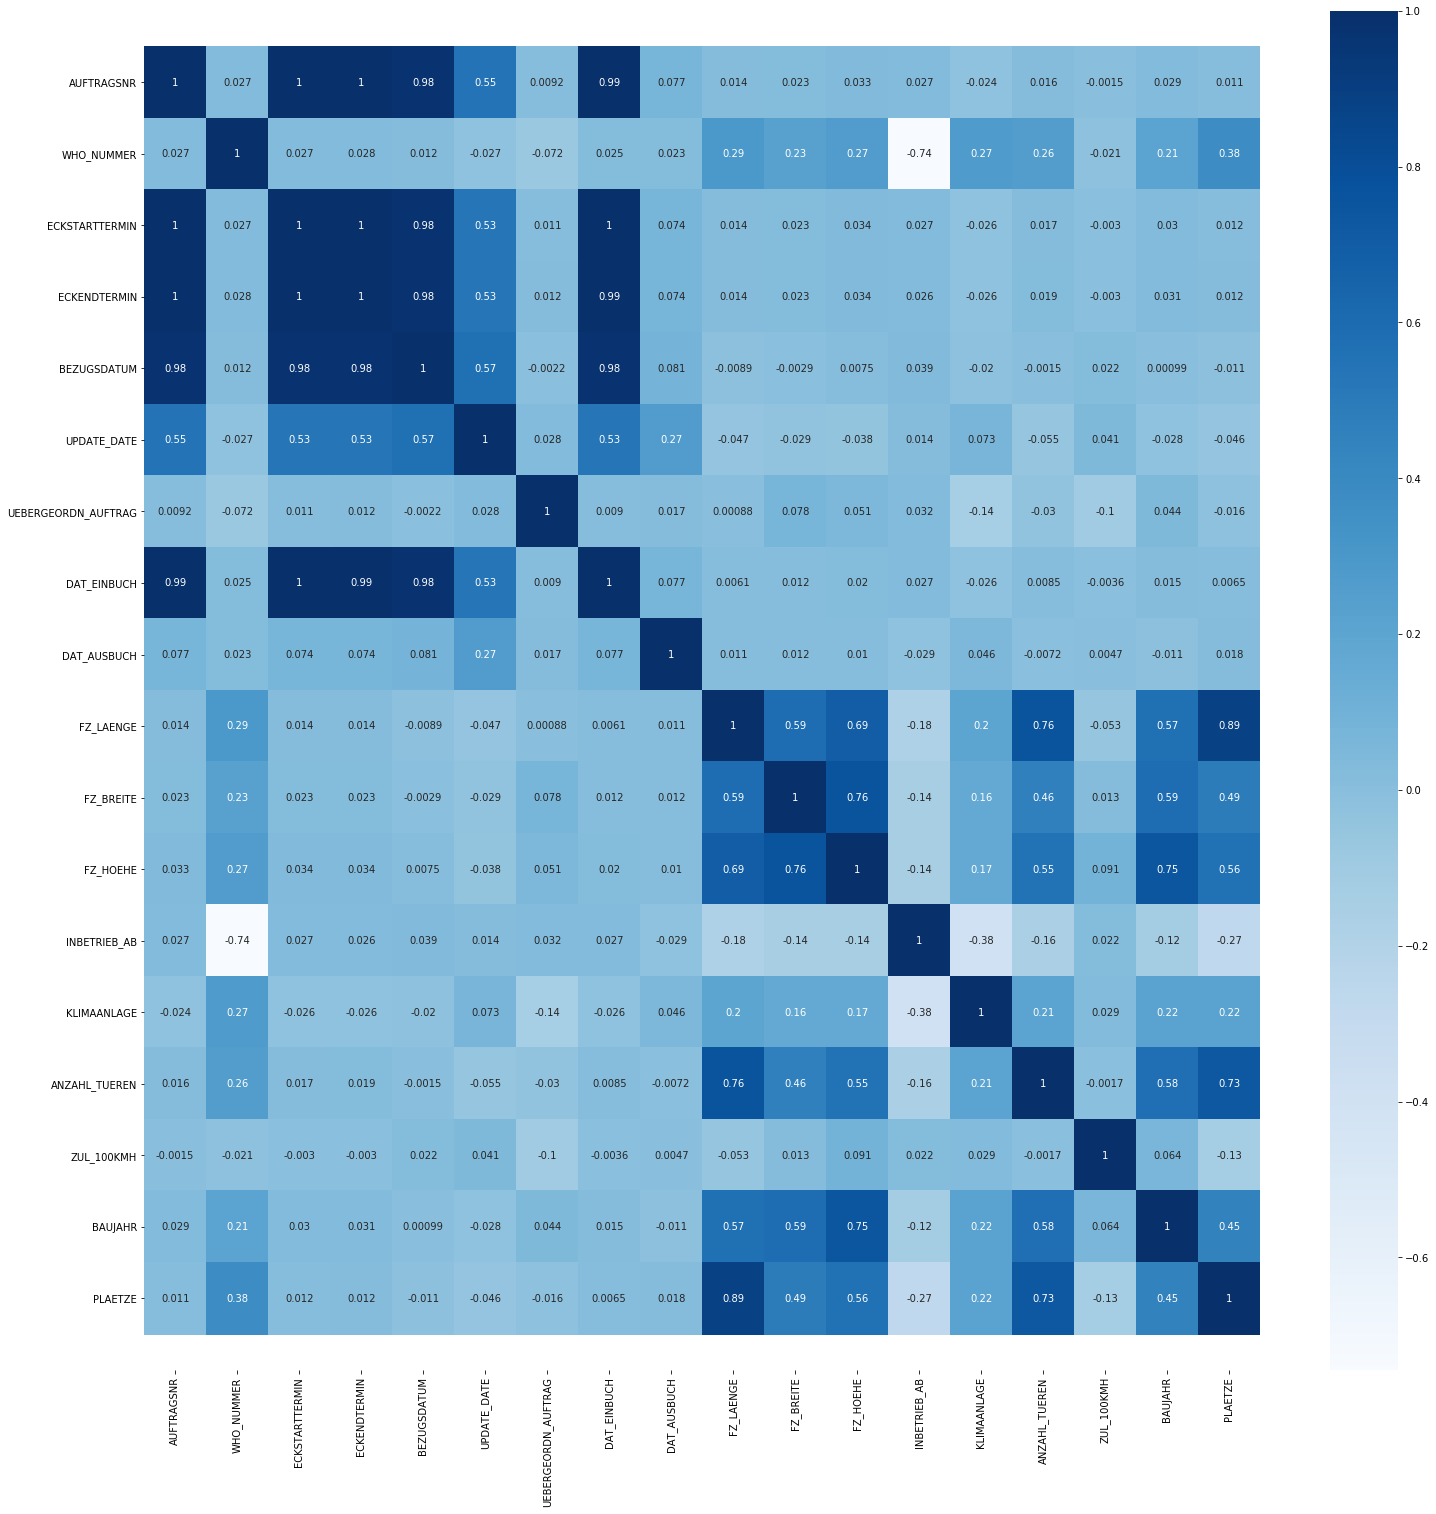

In [25]:
plt.figure(figsize=(25,25))
df_corr = isi_data_neu.corr()
ax = sns.heatmap(df_corr,cmap='Blues',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('test4.pdf')

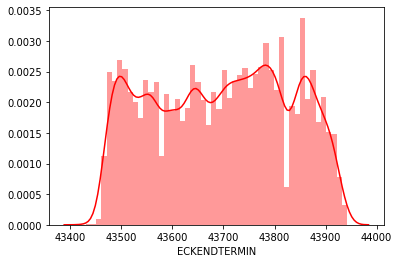

In [17]:
test = isi_data_neu.ECKENDTERMIN
sns.distplot(test, color="red");

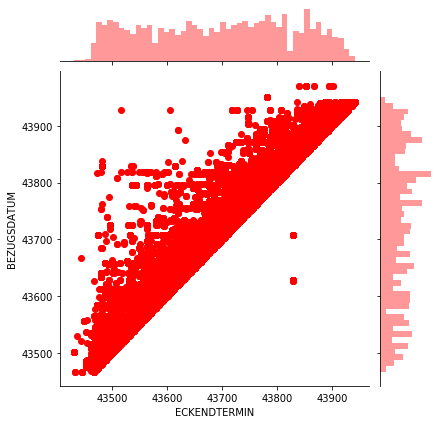

In [18]:
test = isi_data_neu
sns.jointplot(x="ECKENDTERMIN", y="BEZUGSDATUM", data=test, color='red');

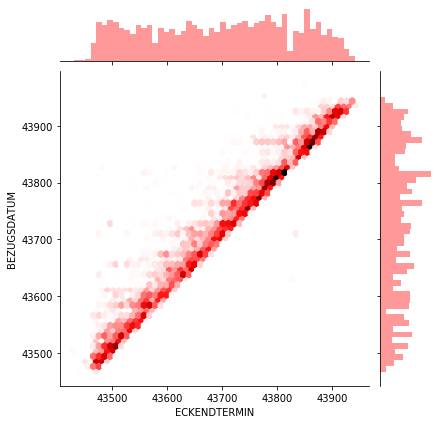

In [19]:
test = isi_data_neu
sns.jointplot(x="ECKENDTERMIN", y="BEZUGSDATUM", data=test, color='red', kind="hex");

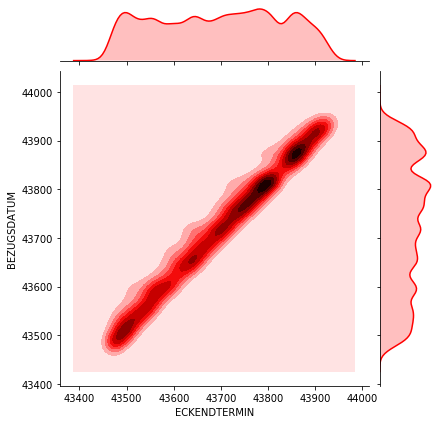

In [20]:
test = isi_data_neu
sns.jointplot(x="ECKENDTERMIN", y="BEZUGSDATUM", data=test, color='red', kind="kde");